<span style='color: lightblue;'>

Has the network latency gone up since we switched internet service providers?

    There is no latency difference between internet service providers

    There is a latency difference between internet service providers


Is the website redesign any good?

    There is no difference between the old website design and the new design.

    There is a difference between the old website design and the new design.

Is our television ad driving more sales?

    There is no difference in sales with the television ad

    There are more sales with the televsion ad. 

In [135]:
import numpy as np
import pandas as pd

from pydataset import data
from scipy import stats

<div class="alert alert-block alert-info">

1- Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [2]:
# Create a dictionary representing the data
data = {
    "": ["Uses a Macbook", "Doesn't Use A Macbook"],
    "Codeup Student": [49, 1],
    "Not Codeup Student": [20, 30]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the first column as the index
df.set_index("", inplace=True)

df


,Codeup Student,Not Codeup Student
,,
Uses a Macbook,49,20
Doesn't Use A Macbook,1,30


In [3]:
chi2, p, dof, expected = stats.chi2_contingency(df)

In [4]:
chi2table = stats.chi2_contingency(df)

In [5]:
chi2table

Chi2ContingencyResult(statistic=36.65264142122487, pvalue=1.4116760526193828e-09, dof=1, expected_freq=array([[34.5, 34.5],
       [15.5, 15.5]]))

In [6]:
a = 0.05

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p:.20f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(pd.DataFrame(expected, index=df.index, columns=df.columns))

if p < a:
    print('We reject the null hypothesis. Using a MacBook and Being a Codeup student are dependent')
else:
    print('We fail to reject the null hypothesis. Using a MacBook and Being a Codeup student are independent')

Chi-square statistic: 36.65264142122487
P-value: 0.00000000141167605262
Degrees of freedom: 1
Expected frequencies:
                       Codeup Student  Not Codeup Student
                                                         
Uses a Macbook                   34.5                34.5
Doesn't Use A Macbook            15.5                15.5
We reject the null hypothesis. Using a MacBook and Being a Codeup student are dependent


<div class="alert alert-block alert-info">
2- Choose another 2 categorical variables from the mpg dataset.

State your null and alternative hypotheses.

State your alpha.

Perform a chi2 test of indepedence.

State your conclusion

H0 null hypothesis: mpg is independent on cylinders

Ha Alternative hyppthesis: mpg is dependent on cylinders

In [9]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [10]:
mpg['cyl_cat'] = mpg['cyl'].map({
    4: '4-cylinder',
    5: '5-cylinder',
    6: '6-cylinder',
    8: '8-cylinder'
})

In [11]:

mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cyl_cat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,4-cylinder
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,4-cylinder
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,4-cylinder
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,4-cylinder
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,6-cylinder


In [12]:
mpg['mean_mpg'] = (mpg.cty + mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cyl_cat,mean_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,4-cylinder,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,4-cylinder,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,4-cylinder,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,4-cylinder,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,6-cylinder,21.0


In [13]:
mpg['mpg_cat'] = pd.qcut(mpg.mean_mpg, 2, labels = ['low_mpg', 'high_mpg'])
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cyl_cat,mean_mpg,mpg_cat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,4-cylinder,23.5,high_mpg
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,4-cylinder,25.0,high_mpg
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,4-cylinder,25.5,high_mpg
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,4-cylinder,25.5,high_mpg
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,6-cylinder,21.0,high_mpg


In [14]:
ct = pd.crosstab(mpg.cyl_cat, mpg.mpg_cat)
ct

mpg_cat,low_mpg,high_mpg
cyl_cat,,
4-cylinder,7,74
5-cylinder,0,4
6-cylinder,46,33
8-cylinder,68,2


In [15]:
chi, p, degf, exp = stats.chi2_contingency(ct)

In [16]:
a = 0.05

if p < a:
    print('We reject the null hypothesis. There appears to be a relationship.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis. There appears to be a relationship.


<div class="alert alert-block alert-info">
3. Use the data from the employees database to answer these questions:


In [136]:
from env import get_connection
from sqlalchemy import text, create_engine

In [18]:
url  =get_connection('employees')

In [20]:
engine = create_engine(url)

In [21]:
query = '''
        SELECT *  

        FROM employees  

        INNER JOIN (
                    SELECT emp_no, dept_no, to_date
                    FROM dept_emp
                    WHERE to_date > curdate()
                    ) AS deps
                    ON employees.emp_no = deps.emp_no
        LEFT JOIN departments ON deps.dept_no = departments.dept_no;'''

In [22]:
text_query = text(query)

In [23]:
emps_df = pd.read_sql(text_query, engine.connect())
emps_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,dept_no,to_date,dept_no,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,d005,9999-01-01,d005,Development
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,d007,9999-01-01,d007,Sales
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,d004,9999-01-01,d004,Production
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,d004,9999-01-01,d004,Production
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,d003,9999-01-01,d003,Human Resources


In [25]:
dept_emps_df =  emps_df[emps_df['dept_name'].isin(['Sales', 'Marketing'])]

In [26]:
gender_dept_ct = pd.crosstab(dept_emps_df.gender, dept_emps_df.dept_name)
gender_dept_ct

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [27]:
chi, p, degf, exp = stats.chi2_contingency(gender_dept_ct)

In [28]:
a = 0.05

if p < a:
    print('We reject the null hypothesis. There appears to be a relationship.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


<span style='color: lightblue;'>
Is an employee's gender independent of whether or not they are or have been a manager?


In [29]:
mang_emps_df =  emps_df[emps_df['dept_name'].isin(['Sales', 'Marketing'])]

In [30]:
gender_mang_ct = pd.crosstab(mang_emps_df.gender, mang_emps_df.dept_name)
gender_mang_ct

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [31]:
chi, p, degf, exp = stats.chi2_contingency(gender_dept_ct)

In [32]:
a = 0.05

if p < a:
    print('We reject the null hypothesis. There appears to be a relationship.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


<div class="alert alert-block alert-info">
1. Answer with the type of stats test you would use (assume normal distribution):


<span style='color: lightblue;'>

* Is there a relationship between the length of your arm and the length of your foot?


Pearson's correlation coefficient.

Measure the strength and direction of a linear relationship between two continuous variables.

H
0
: There is no linear correlation between the length of your arm and the length of your foot.

H
a
: There is a linear relationship between the tlength of your arm and the length of your foot.


<span style='color: lightblue;'>

* Does smoking affect when or not someone has lung cancer?


Chi-squared test

Association between two categorical variables.

H
0
: There is no linear correlation between smoking and lung cancer.

H
a
: There is a linear relationship between smoking and lung cancer.

<span style='color: lightblue;'>

* Is gender independent of a person’s blood type?



Chi-squared test

Association between two categorical variables.

H
0
: There is no linear correlation between gender and the persons blood type.

H
a
: There is a linear relationship between gender and the persons blood type.


<span style='color: lightblue;'>

* Does whether or not a person has a cat or dog affect whether they live in an apartment?



Chi-squared test

Association between two categorical variables.

H
0
: There is no linear correlation between a persons pet type (cat or dog) and dwelling type.

H
a
: There is a linear relationship between a persons pet type (cat or dog) and dwelling type.


<span style='color: lightblue;'>

* Does the length of time of the lecture correlate with a student's grade?


Pearson's correlation coefficient.

Measure the strength and direction of a linear relationship between two continuous variables.

H
0
: There is no linear correlation between the student's grade and the length of the lecture.

H
a
: There is a linear relationship between the student's grade and the length of the lecture.


<div class="alert alert-block alert-info">
2. Use the telco_churn data.

In [33]:
url  =get_connection('telco_churn')

In [34]:
engine = create_engine(url)

In [35]:
query = '''
        SELECT * 
        FROM customers;'''

In [36]:
text_query = text(query)

In [37]:
telco_df = pd.read_sql(text_query, engine.connect())
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [38]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [39]:
# Convert the 'total_charges' column to float
telco_df['total_charges'] = pd.to_numeric(telco_df['total_charges'], errors='coerce')
telco_df['total_charges'] = telco_df['total_charges'].astype(float)

# Now the 'total_charges' column contains float values
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [40]:
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes


<span style='color: SteelBlue;'>

* Does tenure correlate with monthly charges?

<span style='color: YellowGreen;'>
    there is a correleation but it is weak 0.25 r


In [41]:
r, p = stats.pearsonr(telco_df.tenure, telco_df.monthly_charges)
r, p

(0.24789985628615005, 4.09404499149396e-99)

In [42]:
#Function to evaluate p values
def eval_result(p_value, a = 0.05):
    
    if p_value < a:
        
        print('Cool beans! Your result is significant!')
        
    else:
        
        print('Your result was not significant!')

In [43]:
eval_result(p)

Cool beans! Your result is significant!


<span style='color: SteelBlue;'>

* Total charges?


In [44]:
telco_df['total_charges'] = telco_df['total_charges'].fillna(0.0)

In [45]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [46]:
r_tc, p_tc = stats.pearsonr(telco_df.tenure, telco_df.total_charges)
r_tc, p_tc

(0.8261783979502422, 0.0)

In [47]:
eval_result(p_tc)

Cool beans! Your result is significant!


<span style='color: SteelBlue;'>

* What happens if you control for phone and internet service?


In [48]:
telco_filtered = telco_df[(telco_df['phone_service'] == 'Yes') & (telco_df['internet_service_type_id'] == 1)]
telco_filtered.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.40,No
5,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,No,Yes,Yes,Yes,1,Yes,4,69.40,571.45,No
8,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,No,No,No,1,Yes,1,48.20,340.35,No
9,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,Yes,Yes,Yes,3,Yes,2,90.45,5957.90,No


In [49]:
r_filtered, p_filtered = stats.pearsonr(telco_filtered.tenure, telco_filtered.total_charges)
r_filtered, p_filtered

(0.9705931617494685, 0.0)

In [137]:
eval_result(p_filtered)

Cool beans! Your result is significant!


<div class="alert alert-block alert-info">

Use the employees database.


<span style='color: SteelBlue;'>

* Is there a relationship between how long an employee has been with the company and the number of titles they have had?


In [51]:
url  =get_connection('employees')

In [52]:
engine = create_engine(url)

In [97]:
query = '''
SELECT *  
FROM employees.employees
LEFT JOIN (
			SELECT *
            FROM salaries
            WHERE to_date > curdate()
            ) AS sals 
            ON employees.emp_no = sals.emp_no
INNER JOIN (
			SELECT emp_no AS dep_emp_no, dept_no, to_date AS dep_to_date
			FROM dept_emp
			WHERE to_date > curdate()
			) AS deps
			ON employees.emp_no = deps.dep_emp_no
LEFT JOIN departments ON deps.dept_no = departments.dept_no;'''

In [98]:
text_query = text(query)

In [99]:
emp_df = pd.read_sql(text_query, engine.connect())
emp_df.head()


,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,salary,from_date,to_date,dep_emp_no,dept_no,dep_to_date,dept_no,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,88958,2002-06-22,9999-01-01,10001,d005,9999-01-01,d005,Development
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,72527,2001-08-02,9999-01-01,10002,d007,9999-01-01,d007,Sales
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,43311,2001-12-01,9999-01-01,10003,d004,9999-01-01,d004,Production
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,74057,2001-11-27,9999-01-01,10004,d004,9999-01-01,d004,Production
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,94692,2001-09-09,9999-01-01,10005,d003,9999-01-01,d003,Human Resources


In [121]:
# Convert 'to_date' column to datetime
emp_df['to_date'] = pd.to_datetime(emp_df['to_date'], errors='coerce')

# Define the replacement date
replacement_date = pd.to_datetime('2023-08-03', format='%Y-%m-%d')

# Use boolean indexing to replace '9999-01-01' with the replacement date
emp_df.loc[emp_df['to_date'].isna(), 'to_date'] = replacement_date

In [122]:
emp_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,salary,from_date,to_date,dep_emp_no,dept_no,dep_to_date,dept_no,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,88958,2002-06-22,2023-08-03,10001,d005,9999-01-01,d005,Development
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,72527,2001-08-02,2023-08-03,10002,d007,9999-01-01,d007,Sales
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,43311,2001-12-01,2023-08-03,10003,d004,9999-01-01,d004,Production
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,74057,2001-11-27,2023-08-03,10004,d004,9999-01-01,d004,Production
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,94692,2001-09-09,2023-08-03,10005,d003,9999-01-01,d003,Human Resources


<span style='color: SteelBlue;'>

* Is there a relationship between how long an employee has been with the company and their salary?

<div class="alert alert-block alert-info">
Use the sleepstudy data.

<span style='color: SteelBlue;'>

* Is there a relationship between days and reaction time?


<div class="alert alert-block alert-success">

Comparison of Means

<div class="alert alert-block alert-info">
1- Answer with the type of test you would use (assume normal distribution):

<span style='color: SteelBlue;'>
Is there a difference in grades of students on the second floor compared to grades of all students?


<span style='color: Yellowgreen;'>
t-test
1-sample, 2-tailed

<span style='color: SteelBlue;'>Are adults who drink milk taller than adults who don't drink milk?


<span style='color: Yellowgreen;'>
t-test
2-sample, 1-tail

<span style='color: SteelBlue;'>Is the price of gas higher in Texas or in New Mexico?


<span style='color: Yellowgreen;'>
2-sample, 1-tailed

<span style='color: SteelBlue;'>Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

<span style='color: Yellowgreen;'>
anova

<div class="alert alert-block alert-info">
2- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.


<span style='color: Yellowgreen;'>

Null hypothesis: There is no significant difference in the time it takes to sell a home bewteen the two offices.

Alternative hypothesis: There is a significant difference in the time it takes to sell a home bewteen the two offices.


<span style='color: SteelBlue;'>
#1 office

A sample of 40 sales from office 
revealed a mean of 90 days and a standard deviation of 15 days.

In [127]:
#Define normal distribution
monthly_sales = stats.norm(90, 15)
office_one = monthly_sales.rvs(40)

<span style='color: SteelBlue;'>
#2 office 

A sample of 50 sales from office revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [128]:
#Define normal distribution
monthly_sales = stats.norm(100, 20)
office_two = monthly_sales.rvs(50)

In [138]:
#this shuold be at the top with the rest of the import but for study pursposes I will leave here
import matplotlib.pyplot as plt

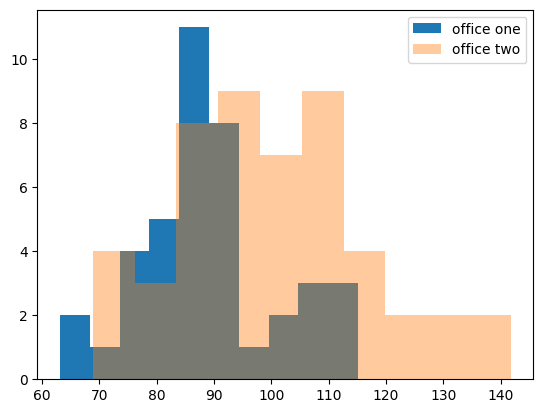

In [139]:
plt.hist(office_one, label = 'office one')
plt.hist(office_two, label = 'office two', alpha = 0.4)
plt.legend()
plt.show()

In [140]:
t_office, p_office = stats.ttest_ind(office_one, office_two)
t_office, p_office

(-3.609012109689199, 0.0005100133548018954)

In [144]:
a = 0.05

if p_office < a:
    
    print('We reject the null hypothesis.')
    
else:
    
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


<div class="alert alert-block alert-info">
3- Load the mpg dataset and use it to answer the following questions:


In [145]:
mpg = data('mpg')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [150]:
mpg['avg_mpg'] = (mpg.cty + mpg.hwy)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg mpg,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0



<span style='color: SteelBlue;'>
Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


<span style='color: Yellowgreen;'>
Null: There is no significant differene in fuel-efficiency between cars from 2008 vs 1999

Alternative: There a no significant differene in fuel-efficiency between cars from 2008 vs 1999

In [160]:
mpg_1999 = mpg[mpg.year == 1999].avg_mpg
mpg_1999.head()

1    23.5
2    25.0
5    21.0
6    22.0
8    22.0
Name: avg_mpg, dtype: float64

In [152]:
mpg_2008 = mpg[mpg.year == 2008].avg_mpg
mpg_2008.head()

3     25.5
4     25.5
7     22.5
10    24.0
11    23.0
Name: avg_mpg, dtype: float64

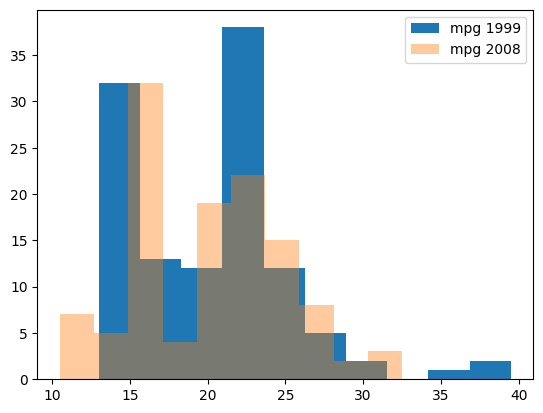

In [162]:
plt.hist(mpg_1999, label = 'mpg 1999')
plt.hist(mpg_2008, label = 'mpg 2008', alpha = 0.4)
plt.legend()
plt.show()

In [155]:
t_year, p_year = stats.ttest_ind(mpg_1999, mpg_2008)
t_year, p_year

(0.21960177245940962, 0.8263744040323578)

In [156]:
a = 0.05

if p_year < a:
    
    print('We reject the null hypothesis.')
    
else:
    
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


<span style='color: SteelBlue;'>
Are compact cars more fuel-efficient than the average car?


<span style='color: Yellowgreen;'>
Null: There is no significant differene in fuel-efficiency between compact cars and the average car. 

Alternative: There is no significant differene in fuel-efficiency between compact cars and the average car. 

In [159]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg mpg,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [166]:
overall_mpg = mpg.avg_mpg.mean()
overall_mpg

20.14957264957265

In [163]:
mpg_compact = mpg[mpg['class'] == 'compact'].avg_mpg
mpg_compact.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: avg_mpg, dtype: float64

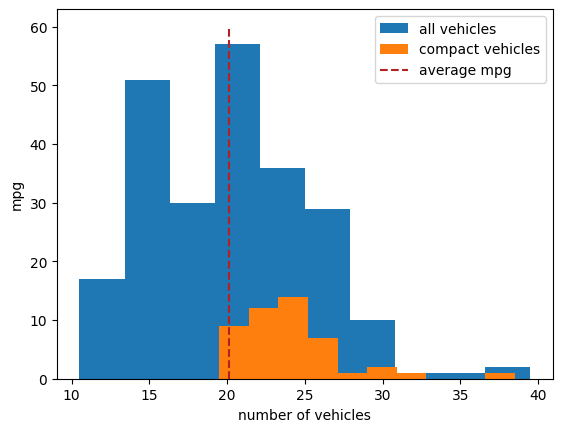

In [185]:
plt.hist(mpg['avg_mpg'], label = 'all vehicles')
plt.hist(mpg_compact, label = 'compact vehicles')
plt.vlines(overall_mpg, 0, 60, color = 'firebrick', label= "average mpg", linestyle='dashed')
plt.xlabel('number of vehicles')
plt.ylabel('mpg')
plt.legend()
plt.show()

In [167]:
t_compact, p_compact = stats.ttest_1samp(mpg_compact, overall_mpg)
t_compact, p_compact

(7.896888573132533, 4.198563794317163e-10)

In [173]:
a = 0.05

if p_compact < a:
    
    print('We reject the null hypothesis.')
    
else:
    
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


<span style='color: SteelBlue;'>
Do manual cars get better gas mileage than automatic cars?

<span style='color: Yellowgreen;'>
Null: Manual cars get less than or the same average milage than automatic cars.

Alternative: Manual cars get better milage than automatic cars.

In [174]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg mpg,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [177]:
mpg_manual = mpg[mpg['trans'].str.contains('manual', case=False)].avg_mpg
mpg_manual.head()

2     25.0
3     25.5
6     22.0
8     22.0
10    24.0
Name: avg_mpg, dtype: float64

In [178]:
mpg_auto = mpg[mpg['trans'].str.contains('auto', case=False)].avg_mpg
mpg_auto.head()

1    23.5
4    25.5
5    21.0
7    22.5
9    20.5
Name: avg_mpg, dtype: float64

TypeError: vlines() missing 2 required positional arguments: 'ymin' and 'ymax'

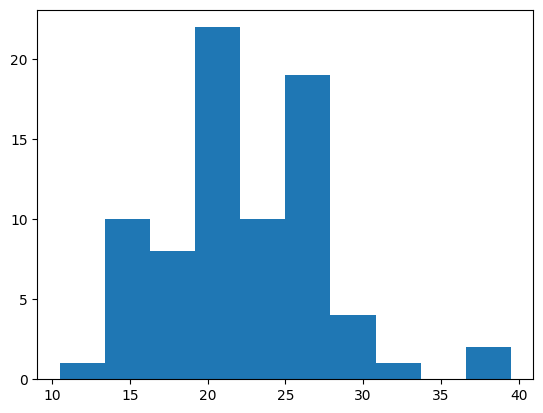

In [189]:
plt.hist(mpg_manual, label= 'Manual Vehicles')
plt.vlines(mpg_manual[].mean())
plt.hist(mpg_auto, label= 'Auto Vehicles', alpha= 0.4)
plt.legend()

In [186]:
t_trans, p_trans = stats.ttest_ind(mpg_manual, mpg_auto)
t_trans, p_trans

(4.593437735750014, 7.154374401145683e-06)

In [187]:
a = 0.05

if (t_trans > 0) and (p_trans / 2 < a):
    
    print('We reject the null hypothesis.')
    
else:
    
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.
